In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import sklearn
df = pd.read_csv("./training-set.csv")

In [17]:
df.head()

,Pos_Sentiment,Neg_Sentiment,Polarity,Type
0,5,5,0,TRUE
1,1,0,1,TRUE
2,3,1,2,TRUE
3,17,29,-12,TRUE
4,13,4,9,TRUE


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638 entries, 0 to 2637
Data columns (total 4 columns):
Pos_Sentiment    2638 non-null int64
Neg_Sentiment    2638 non-null int64
Polarity         2638 non-null int64
Type             2638 non-null object
dtypes: int64(3), object(1)
memory usage: 82.5+ KB


In [19]:
df.describe()

,Pos_Sentiment,Neg_Sentiment,Polarity
count,2638.000000,2638.000000,2638.000000
mean,5.247157,6.059894,-0.812737
std,6.082010,7.086885,6.803697
min,0.000000,0.000000,-46.000000
25%,1.000000,1.000000,-4.000000
50%,3.000000,4.000000,0.000000
75%,7.000000,9.000000,2.000000
max,51.000000,63.000000,47.000000


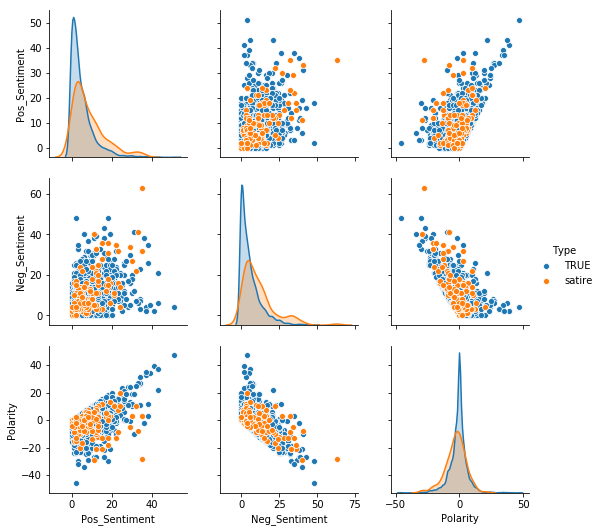

In [20]:
sns.pairplot(df, hue='Type')

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(df.drop('Type', axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_features = scaler.transform(df.drop('Type', axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [25]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [26]:
df_feat.head()

,Pos_Sentiment,Neg_Sentiment,Polarity
0,-0.040645,-0.149585,0.119478
1,-0.698447,-0.855248,0.266485
2,-0.369546,-0.714115,0.413491
3,1.932761,3.237594,-1.644604
4,1.274959,-0.290718,1.442539


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_feat
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[755   0]
 [ 36   1]]
              precision    recall  f1-score   support

        TRUE       0.95      1.00      0.98       755
      satire       1.00      0.03      0.05        37

   micro avg       0.95      0.95      0.95       792
   macro avg       0.98      0.51      0.51       792
weighted avg       0.96      0.95      0.93       792

